In [1]:
import numpy as np
import math 

In [2]:
class LinearRegression():
    #Define a Linear Regression class to store our relevant functions in
    
    def __init__(self):
        '''
            Initializes the Linear Regression model. Also stores the self.params__ variable, which
        will be the weights that the model returns.
        '''
        self.params__ = None

    def gradientDescent(self, X, y, learning_rate=0.00001, iterations=500, batch_size=16):
        '''
            This function applies the Gradient Descent model onto the dataset
        :param X: numpy.ndarray
            The X matrix containing the independent variable columns.
        :param y: numpy.ndarray
            The target vector y.
        '''
        
        #Add a column of ones for the constant term
        X = np.concatenate([X, np.ones_like(y)], axis = 1)
        rows, cols = X.shape
        
        #Combine the X and y columns to more easily shuffle it later
        X = np.append(X, y, axis=1)
        
        #Make the initial random guess for w
        w = np.random.random((cols, 1))
        
        #Go through all the iterations
        for i in range(iterations):
            #Shuffle the rows of the data
            np.random.shuffle(X)
            #Define X and y again
            y_it = X[:, -1].reshape((rows, 1))
            X_it = X[:, :-1]
            
            #Iterate through the batches
            for batch in range(math.ceil(rows / batch_size)):
                batch_start = batch * batch_size
                
                #Cut a batch from the dataset
                x_batch = X_it[batch_start : min(batch_start + batch_size, X.shape[0])]
                y_batch = y_it[batch_start : min(batch_start + batch_size, X.shape[0])]
                
                #Subtract the gradient from our previous estimation
                w -= learning_rate * np.matmul(x_batch.transpose(), (np.matmul(x_batch, w) - y_batch))
        
        self.params__= w
        return self
        
    def predict(self, X):
        X = np.concatenate([X, np.ones(X.shape[0]).reshape((X.shape[0], 1))], axis=1)
        return np.matmul(X, self.params__)

In [189]:
X = np.random.uniform(0, 10, [64, 2])
row, col = X.shape
e = np.random.uniform(-5, 5, row)
Y = X[:, 0] * 2 + X[:, 1] + e
Y = Y.reshape((Y.shape[0], 1))

In [190]:
model = LinearRegression().gradientDescent(X, Y, learning_rate=0.0001, iterations=500, batch_size=16)
model.params__

array([[ 2.1074845 ],
       [ 1.08737642],
       [-0.98035802]])

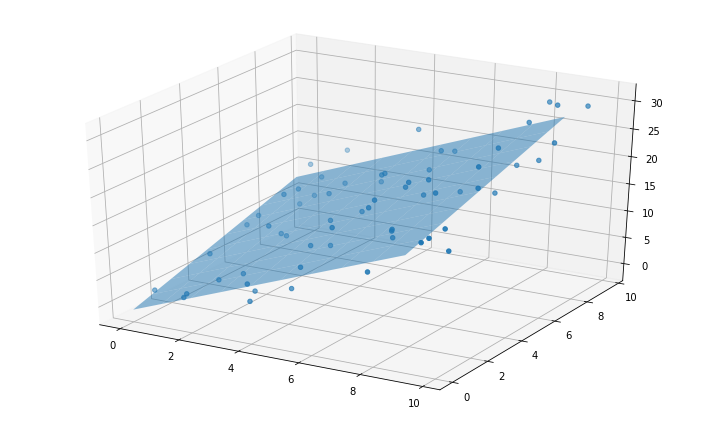

In [192]:
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
wghts = model.params__
x, y = np.meshgrid(range(10), range(10))
z = wghts[-1] + wghts[0] * x + wghts[1] * y

ax = plt.axes(projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)
ax.plot_surface(x, y, z, alpha=0.5)
plt.show()

In [60]:
gradientDescent(X, Y)

NameError: name 'gradientDescent' is not defined

In [3]:
X = np.random.uniform(0, 10, (64, 1))
X = np.concatenate((X, X * 2), axis=1)
rows = X.shape[0]
e = np.random.uniform(-5, 5, rows)
Y = X[:, 0] * 2 + X[:, 1]
Y = Y.reshape((Y.shape[0], 1))

In [4]:
model = LinearRegression().gradientDescent(X, Y, learning_rate=0.0001, iterations=500, batch_size=16)
model.params__

array([[0.58276593],
       [1.70540296],
       [0.04340569]])

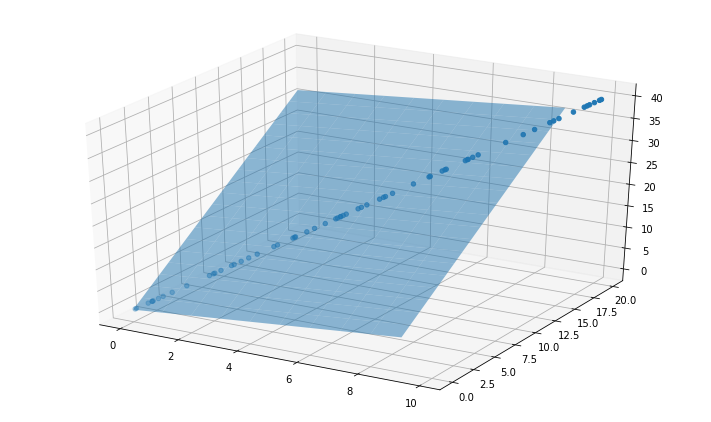

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
wghts = model.params__
x, y = np.meshgrid(range(10), range(20))
z = wghts[-1] + wghts[0] * x + wghts[1] * y

ax = plt.axes(projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)
ax.plot_surface(x, y, z, alpha=0.5)
plt.show()

In [155]:
weights.params__

array([[2.02651865],
       [0.94764463],
       [0.45939988]])

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt